In [ ]:
# import library data manipulation & visualization
import pandas as pd
import numpy as np
import itertools

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
plt.style.use('seaborn-white')
%matplotlib inline

#statistics libraries
import statsmodels.api as sm
import scipy
from scipy.stats import anderson
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, plot_acf, plot_pacf, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox as ljung
#from nimbusml.timeseries import SsaForecaster
from statsmodels.tsa.statespace.tools import diff as diff
import pmdarima as pm
from pmdarima import ARIMA, auto_arima
from scipy import signal
from scipy.stats import shapiro
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
from pylab import rcParams
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

## 1.  First order properties 

In [3]:

df=pd.read_csv('stock(1).csv')


In [4]:
df.head()

,Date,A_Open,A_High,A_Low,A_Close,A_Volume,G_Open,G_High,G_Low,G_Close,G_Volume
0,01/03/06,10.34,10.68,10.32,10.68,201853036,211.47,218.05,209.32,217.83,13137450
1,01/04/06,10.73,10.85,10.64,10.71,155225609,222.17,224.70,220.09,222.84,15292353
2,01/05/06,10.69,10.70,10.54,10.63,112396081,223.22,226.00,220.97,225.85,10815661
3,01/06/06,10.75,10.96,10.65,10.90,176139334,228.66,235.49,226.85,233.06,17759521
4,01/09/06,10.96,11.03,10.82,10.86,168861224,233.44,236.94,230.70,233.68,12795837


In [5]:
df.loc[(df['Date'].str[:2]== '03') | (df['Date'].str[:2]== '04') | (df['Date'].str[:2]== '05'),'Spring']=1
df.loc[(df['Date'].str[:2]== '06') | (df['Date'].str[:2]== '07') | (df['Date'].str[:2]== '08'),'Summer']=1
df.loc[(df['Date'].str[:2]== '09') | (df['Date'].str[:2]== '10') | (df['Date'].str[:2]== '11'),'Fall']=1
df.loc[(df['Date'].str[:2]== '12') | (df['Date'].str[:2]== '01') | (df['Date'].str[:2]== '02'),'Winter']=1
df['Spring'] = df['Spring'].fillna(0)
df['Summer'] = df['Summer'].fillna(0)
df['Fall'] = df['Fall'].fillna(0)
df['Winter'] = df['Winter'].fillna(0)
df

,Date,A_Open,A_High,A_Low,A_Close,A_Volume,G_Open,G_High,G_Low,G_Close,G_Volume,Spring,Summer,Fall,Winter
0,01/03/06,10.34,10.68,10.32,10.68,201853036,211.47,218.05,209.32,217.83,13137450,0.0,0.0,0.0,1.0
1,01/04/06,10.73,10.85,10.64,10.71,155225609,222.17,224.70,220.09,222.84,15292353,0.0,0.0,0.0,1.0
2,01/05/06,10.69,10.70,10.54,10.63,112396081,223.22,226.00,220.97,225.85,10815661,0.0,0.0,0.0,1.0
3,01/06/06,10.75,10.96,10.65,10.90,176139334,228.66,235.49,226.85,233.06,17759521,0.0,0.0,0.0,1.0
4,01/09/06,10.96,11.03,10.82,10.86,168861224,233.44,236.94,230.70,233.68,12795837,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,12/22/17,174.68,175.42,174.50,175.01,16349444,1070.00,1071.72,1067.64,1068.86,889446,0.0,0.0,0.0,1.0
3015,12/26/17,170.80,171.47,169.68,170.57,33185536,1068.64,1068.86,1058.64,1065.85,918767,0.0,0.0,0.0,1.0
3016,12/27/17,170.10,170.78,169.71,170.60,21498213,1066.60,1068.27,1058.38,1060.20,1116203,0.0,0.0,0.0,1.0
3017,12/28/17,171.00,171.85,170.48,171.08,16480187,1062.25,1064.84,1053.38,1055.95,994249,0.0,0.0,0.0,1.0


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,A_Open,A_High,A_Low,A_Close,A_Volume,G_Open,G_High,G_Low,G_Close,G_Volume,Spring,Summer,Fall,Winter
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,211.47,218.05,209.32,217.83,13137450,0.0,0.0,0.0,1.0
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,222.17,224.70,220.09,222.84,15292353,0.0,0.0,0.0,1.0
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,223.22,226.00,220.97,225.85,10815661,0.0,0.0,0.0,1.0
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,228.66,235.49,226.85,233.06,17759521,0.0,0.0,0.0,1.0
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,233.44,236.94,230.70,233.68,12795837,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,2017-12-22,174.68,175.42,174.50,175.01,16349444,1070.00,1071.72,1067.64,1068.86,889446,0.0,0.0,0.0,1.0
3015,2017-12-26,170.80,171.47,169.68,170.57,33185536,1068.64,1068.86,1058.64,1065.85,918767,0.0,0.0,0.0,1.0
3016,2017-12-27,170.10,170.78,169.71,170.60,21498213,1066.60,1068.27,1058.38,1060.20,1116203,0.0,0.0,0.0,1.0
3017,2017-12-28,171.00,171.85,170.48,171.08,16480187,1062.25,1064.84,1053.38,1055.95,994249,0.0,0.0,0.0,1.0


In [7]:
#data inspection
df.tail()

,Date,A_Open,A_High,A_Low,A_Close,A_Volume,G_Open,G_High,G_Low,G_Close,G_Volume,Spring,Summer,Fall,Winter
3014,2017-12-22,174.68,175.42,174.50,175.01,16349444,1070.00,1071.72,1067.64,1068.86,889446,0.0,0.0,0.0,1.0
3015,2017-12-26,170.80,171.47,169.68,170.57,33185536,1068.64,1068.86,1058.64,1065.85,918767,0.0,0.0,0.0,1.0
3016,2017-12-27,170.10,170.78,169.71,170.60,21498213,1066.60,1068.27,1058.38,1060.20,1116203,0.0,0.0,0.0,1.0
3017,2017-12-28,171.00,171.85,170.48,171.08,16480187,1062.25,1064.84,1053.38,1055.95,994249,0.0,0.0,0.0,1.0
3018,2017-12-29,170.52,170.59,169.22,169.23,25999922,1055.49,1058.05,1052.70,1053.40,1180340,0.0,0.0,0.0,1.0


#### GOOGLE:

In [8]:
#google Orginal Series
data_G =pd.read_csv('google.csv',parse_dates=True, index_col="Date")
data_G = data_G.resample('MS').mean()

print(data_G)


                 G_High
Date                   
2006-01-01   226.896000
2006-02-01   188.769474
2006-03-01   182.565652
2006-04-01   209.871579
2006-05-01   195.468636
...                 ...
2017-08-01   943.635217
2017-09-01   950.883000
2017-10-01  1006.200909
2017-11-01  1052.581429
2017-12-01  1061.423000

[144 rows x 1 columns]


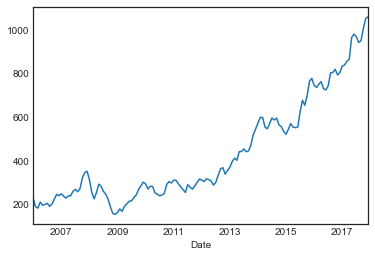

In [9]:
googl_orig=data_G["G_High"].plot()

<AxesSubplot:xlabel='Date'>

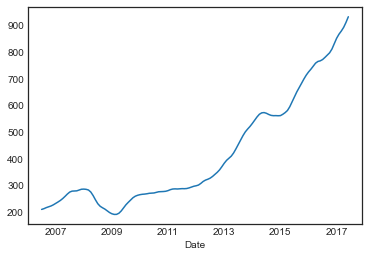

In [10]:
#google trend
decomposed_google_High = sm.tsa.seasonal_decompose(data_G["G_High"],model='multiplicative') # The frequncy is annual
decomposed_google_High.trend.plot()


<AxesSubplot:xlabel='Date'>

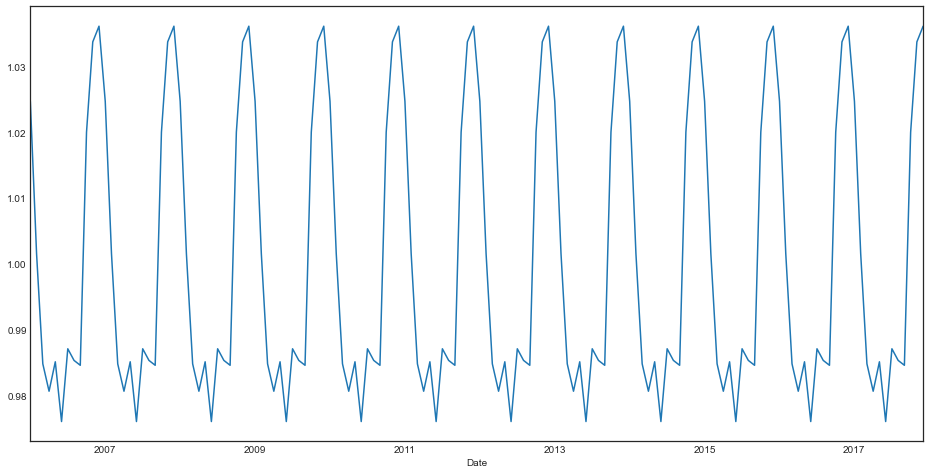

In [11]:
#google seasonality
decomposed_google_High.seasonal.plot(figsize=(16,8))

<AxesSubplot:xlabel='Date'>

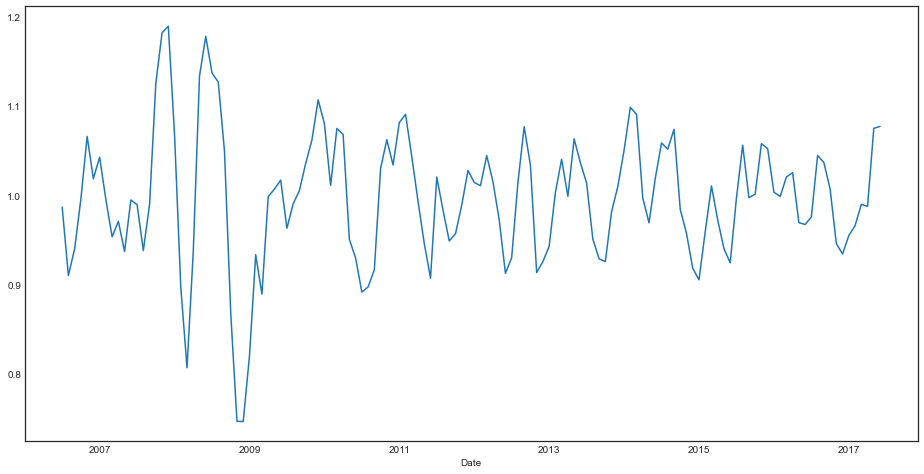

In [12]:
#google cycles
decomposed_google_High.resid.plot(figsize=(16,8))

#### APPLE

In [13]:
#apple Orginal Series
data_A=pd.read_csv('aaple.csv',parse_dates=True, index_col="Date")
data_A = data_A.resample('MS').mean()
print(data_A)


                A_High
Date                  
2006-01-01   11.352000
2006-02-01   10.164737
2006-03-01    9.336522
2006-04-01    9.733158
2006-05-01    9.728636
...                ...
2017-08-01  160.151739
2017-09-01  158.869500
2017-10-01  158.586818
2017-11-01  173.428095
2017-12-01  172.885500

[144 rows x 1 columns]


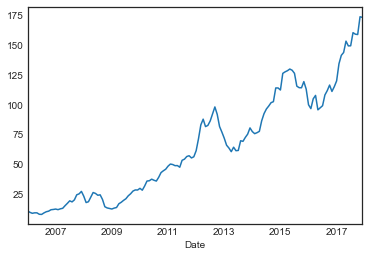

In [14]:
aapl_orig=data_A["A_High"].plot()

<AxesSubplot:xlabel='Date'>

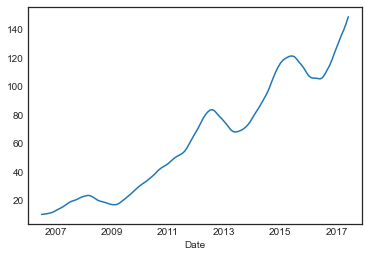

In [15]:
#apple trend
decomposed_aapl_High = sm.tsa.seasonal_decompose(data_A["A_High"],model='multiplicative') # The frequncy is annual

decomposed_aapl_High.trend.plot()


<AxesSubplot:xlabel='Date'>

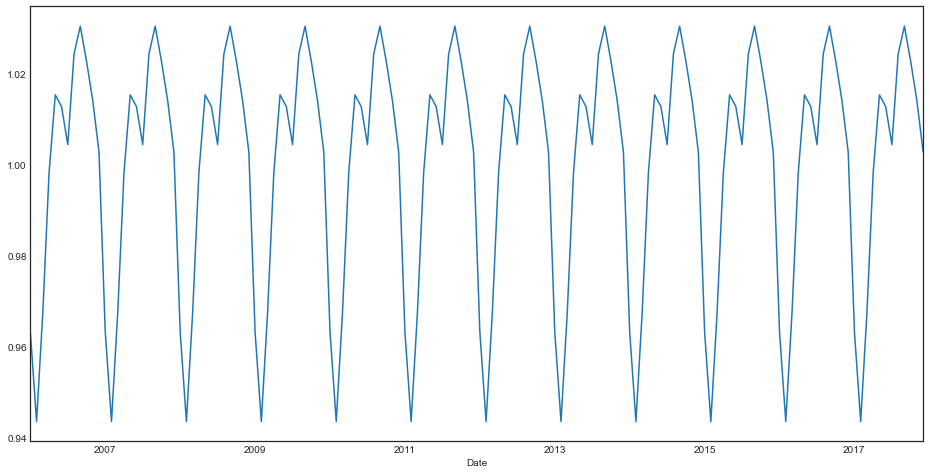

In [16]:
#apple seasonality
decomposed_aapl_High.seasonal.plot(figsize=(16,8))


<AxesSubplot:xlabel='Date'>

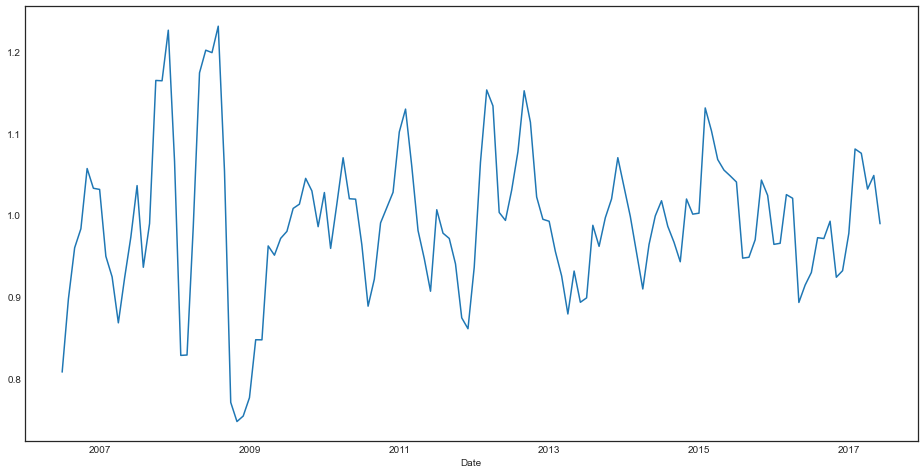

In [17]:
#apple cycles
decomposed_aapl_High.resid.plot(figsize=(16,8))

#  2.Second Order Properties

### 2.1 Decompostition plot

#### Google

Text(0.5, 0.98, 'Google Multiplicative Decomposition')

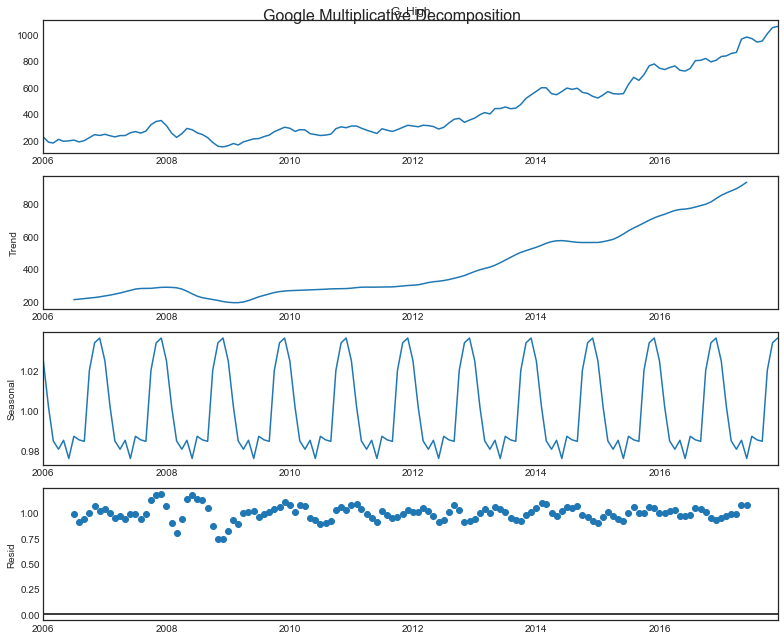

In [18]:
figure1 = seasonal_decompose(data_G["G_High"],model='multiplicative')
rcParams['figure.figsize'] = (11, 9);
figure1.plot().suptitle('Google Multiplicative Decomposition', fontsize=16)

#### Apple

Text(0.5, 0.98, 'Apple Multiplicative Decomposition')

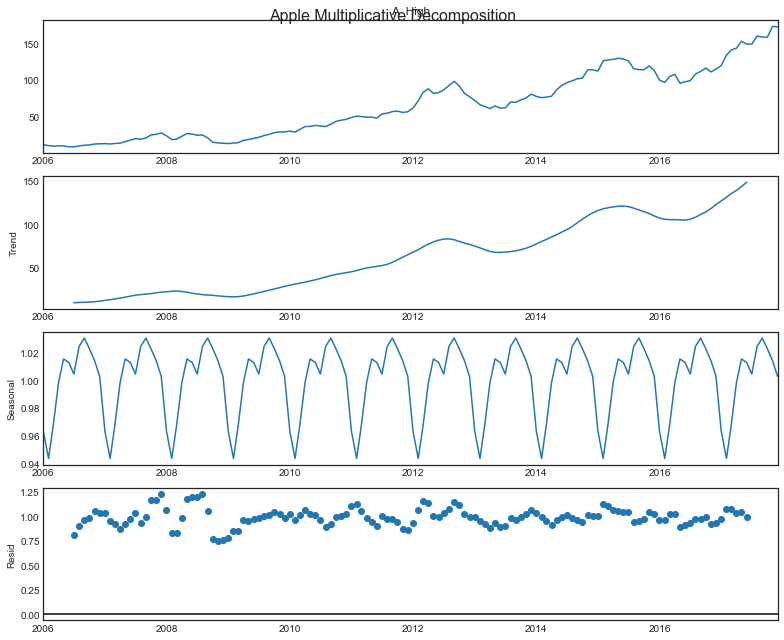

In [19]:

figure2 = seasonal_decompose(data_A["A_High"],model='multiplicative')
rcParams['figure.figsize'] = (11, 9);
figure2.plot().suptitle('Apple Multiplicative Decomposition', fontsize=16)


In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
%matplotlib inline
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
plt.style.use('fivethirtyeight')
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
import math
from sklearn.metrics import mean_squared_error

### 2.2 Correlation and Autocorrelation(ACF)

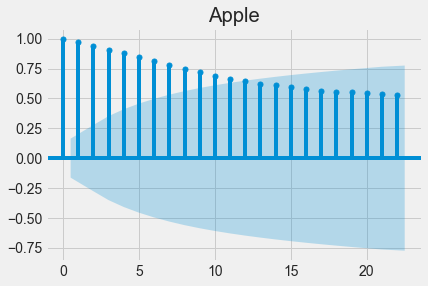

In [21]:
plot_acf(data_A['A_High'], title = "Apple")
pyplot.show()

Since all lags are close to 1, Apple High is statistically significant

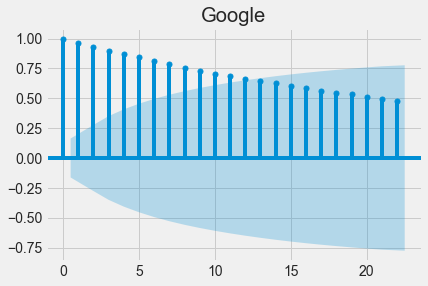

In [22]:
plot_acf(data_G['G_High'], title = "Google")
pyplot.show()

Since all lags are close to 1, Google High is statistically significant

### 2.3 Partial Autocorrelation Function (PACF)


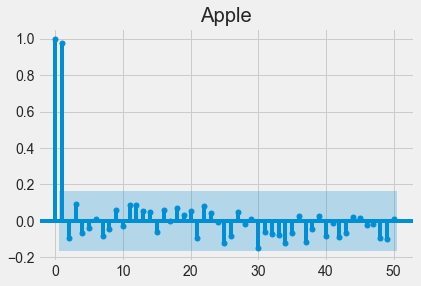

In [23]:
plot_pacf(data_A['A_High'],lags = 50, title = "Apple")
pyplot.show()

Although it is statistically significant, partial autocorrelation after first 2 lags is very low. Only 0th and 1st lags are statistically significant.

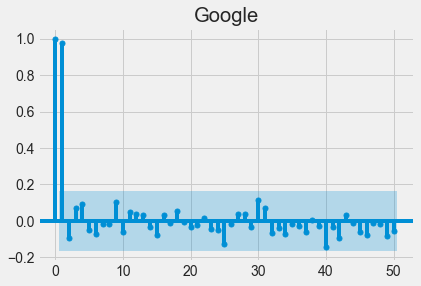

In [24]:
plot_pacf(data_G['G_High'],lags = 50, title = "Google")
pyplot.show()

Although it is statistically significant, partial autocorrelation after first 2 lags is very low. Only 0th, 1st, and aound 46th lags are statistically significant.

### 2.4 Stationary

#### google

<AxesSubplot:xlabel='Date'>

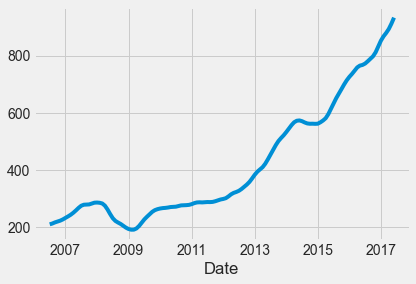

In [25]:
decomposed_google_High = sm.tsa.seasonal_decompose(data_G["G_High"]) # The frequncy is annual

decomposed_google_High.trend.plot()

<AxesSubplot:xlabel='Date'>

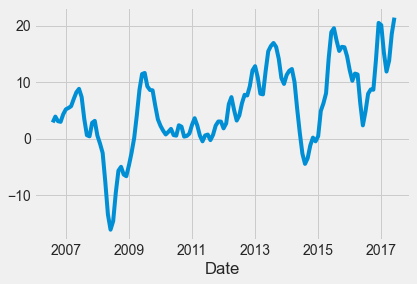

In [26]:
decomposed_google_High.trend.diff().plot()

In [27]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(data_G["G_High"])[1]
print(f"p value:{adf}", ", Series is Stationary" if adf <0.05 else ", Series is Non-Stationary")

p value:0.9988133621931398 , Series is Non-Stationary


p value:2.3470473352350823e-14 , Series is Stationary


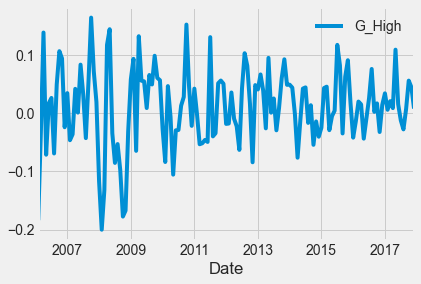

In [28]:
#Try De-trending the series by applying the first difference to the log(data)
dataG =  np.log(data_G)
de_trendedG = dataG.diff(1).dropna()
adf_G = adfuller(de_trendedG)[1]
print(f"p value:{adf_G}", ", Series is Stationary" if adf_G <0.05 else ", Series is Non-Stationary")
de_trendedG.plot();


The graph result that series is stationary, and exist obvious seasonality rules.

#### Apple

<AxesSubplot:xlabel='Date'>

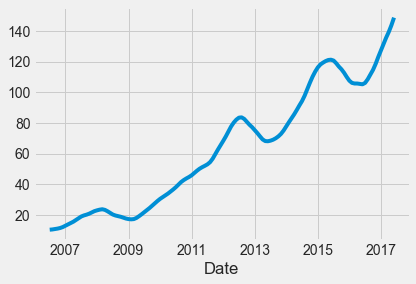

In [29]:
decomposed_aapl_High = sm.tsa.seasonal_decompose(data_A["A_High"]) # The frequncy is annual
decomposed_aapl_High.trend.plot()

<AxesSubplot:xlabel='Date'>

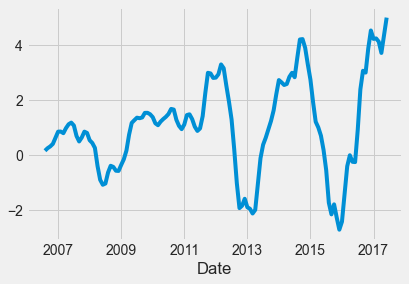

In [30]:
decomposed_aapl_High.trend.diff().plot()

In [31]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(data_A["A_High"])[1]
print(f"p value:{adf}", ", Series is Stationary" if adf <0.05 else ", Series is Non-Stationary")

p value:0.9875555299181431 , Series is Non-Stationary


p value:7.804402402696423e-12 , Series is Stationary


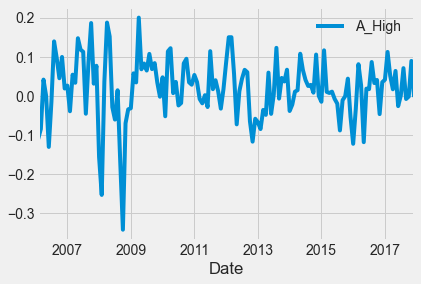

In [32]:
#Try De-trending the series by applying the first difference to the log(data)
dataA =  np.log(data_A)
de_trendedA = dataA.diff(1).dropna()
adf_A = adfuller(de_trendedA)[1]
print(f"p value:{adf_A}", ", Series is Stationary" if adf_A <0.05 else ", Series is Non-Stationary")
de_trendedA.plot();

The graph result that series is stationary, and exist obvious seasonality rules

## 3. ARIMA model

#### Apple

p value:1.4773855661851962e-15 , Series is Stationary


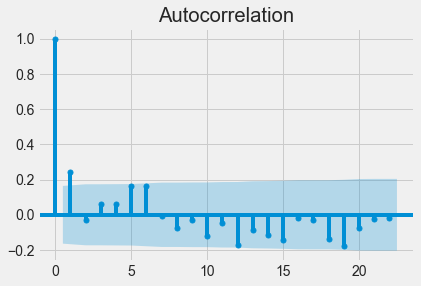

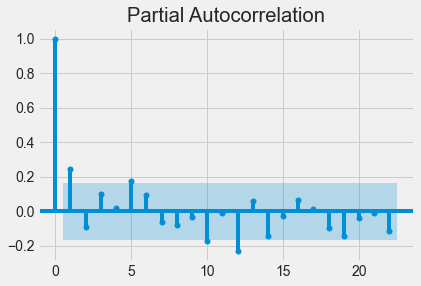

                               SARIMAX Results                                
Dep. Variable:                 A_High   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -415.470
Date:                Wed, 01 Dec 2021   AIC                            836.940
Time:                        16:22:50   BIC                            845.828
Sample:                    01-01-2006   HQIC                           840.552
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2113      0.188     -1.123      0.261      -0.580       0.157
ma.L1          0.5287      0.147      3.603      0.000       0.241       0.816
sigma2        19.5297      1.800     10.849      0.0

In [33]:
from statsmodels.tsa.arima.model import ARIMA as ARIMA_
detrended_a = data_A.diff(1).dropna()
adf_detrended_a = adfuller(detrended_a)[1]
print(f"p value:{adf_detrended_a}", ", Series is Stationary" if adf_detrended_a < 0.05 else ", Series is Non-Stationary")
plot_acf(detrended_a)
plot_pacf(detrended_a)
plt.show()
model_1 = ARIMA_(data_A,order=(1,1,1)).fit()
print(model_1.summary())

#### Google

p value:3.2755599730599618e-15 , Series is Stationary


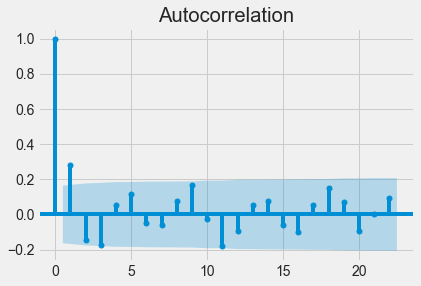

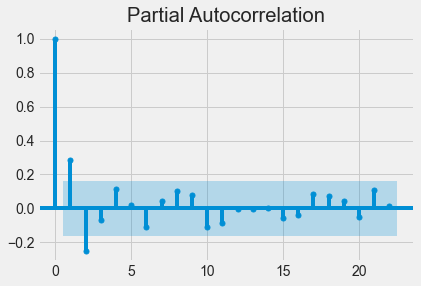

                               SARIMAX Results                                
Dep. Variable:                 G_High   No. Observations:                  144
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -652.119
Date:                Wed, 01 Dec 2021   AIC                           1308.238
Time:                        16:22:51   BIC                           1314.164
Sample:                    01-01-2006   HQIC                          1310.646
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3804      0.077      4.912      0.000       0.229       0.532
sigma2       534.6150     45.674     11.705      0.000     445.095     624.135
Ljung-Box (L1) (Q):                   0.14   Jarque-

In [34]:
detrended_g = data_G.diff(1).dropna()
adf_detrended_g = adfuller(detrended_g)[1]
print(f"p value:{adf_detrended_g}", ", Series is Stationary" if adf_detrended_a < 0.05 else ", Series is Non-Stationary")
plot_acf(detrended_g)
plot_pacf(detrended_g)
plt.show()
model_2 = ARIMA_(data_G,order=(0,1,1)).fit()
print(model_2.summary())

As for the part 3, we were using the ARIMA model to forecast a time series using the series past values. Base on its own lags and the lagged forecast errors, the ARIMA model could be used to forecast future values. From both of our Apple and Google models, the p terms which stands for Auto Regressive term were 2, q terms which stands for Moving Average term were 1 and d terms which stands for number of differencing required to make the time series stationary were 0. As for the results of both ARIMA models, all the independent variables are statistically important and taking the slight lag into account, and RMSE is low enough, which represent that this is a fine model.


## 4. Fit a model that includes, trend, seasonality and cyclical components

#### Apple

In [35]:
decomposeA = sm.tsa.seasonal_decompose(data_A["A_High"],model='multiplicative', extrapolate_trend='freq')
A_reconstructed = pd.concat([decomposeA.seasonal, decomposeA.trend, decomposeA.resid, decomposeA.observed], axis=1)
A_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
A_reconstructed.head()

,seas,trend,resid,actual_values
Date,,,,
2006-01-01,1.043845,5.198478,2.091992,11.352000
2006-02-01,0.988458,5.890952,1.745631,10.164737
2006-03-01,0.984695,6.583425,1.440228,9.336522
2006-04-01,1.005727,7.275898,1.330109,9.733158
2006-05-01,1.011519,7.968372,1.207003,9.728636


First, extract all our formations and make sure the actual value is equal to Product of (Seasonal * Trend * Resid).

In [36]:
# Seasonally adjust the series
apple_seasAdj = data_A.A_High / decomposeA.seasonal
apple_seasAdj

Date
2006-01-01     10.875173
2006-02-01     10.283425
2006-03-01      9.481634
2006-04-01      9.677738
2006-05-01      9.617845
                 ...    
2017-08-01    159.355616
2017-09-01    157.636725
2017-10-01    158.764595
2017-11-01    174.008777
2017-12-01    175.634038
Freq: MS, Length: 144, dtype: float64

The nature of stationary time series data is not time-dependent; time series with trends or seasonality are not stationary. So to eliminate the non-stationarity, an adjustment was made.

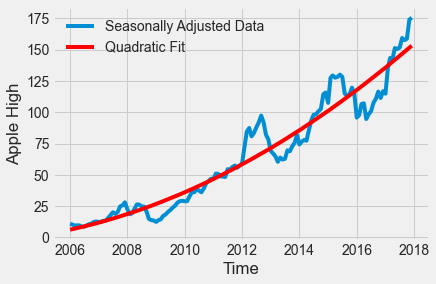

In [37]:
# Fit a quadratic trend
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

x_ts = data_A.index
y_ts = apple_seasAdj
n = np.shape(y_ts)[0]

# Quadratic Fit
t = range(n)
p = np.polyfit(t,y_ts,2)
y = np.polyval(p,t)
plt.plot(x_ts,y_ts,label='Seasonally Adjusted Data')
plt.plot(x_ts,y,color='r',label ='Quadratic Fit')
plt.xlabel('Time')
plt.ylabel('Apple High')
plt.legend()


The growth trend of the time series of stock price maximums does not look linear and grows more rapidly in the last years. A simpler nonlinear function is a quadratic polynomial function. So we superimpose the estimated trend on top of the original series graph.

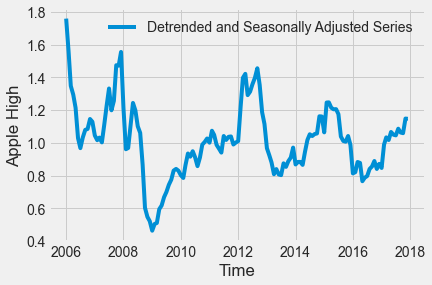

In [38]:
cycles_A = y_ts/y
plt.plot(x_ts,cycles_A,label='Detrended and Seasonally Adjusted Series')
plt.xlabel('Time')
plt.ylabel('Apple High')
plt.legend()


Fitting cycles; detrending the series and obtaining residuals (cycles).

In [39]:
# cycles stationary

adf_cycles_A = adfuller(cycles_A)[1]
print(f"p value:{adf_cycles_A}", ", Series is Stationary" if adf_cycles_A < 0.05 else ", Series is Non-Stationary")


p value:0.0031314706562997003 , Series is Stationary


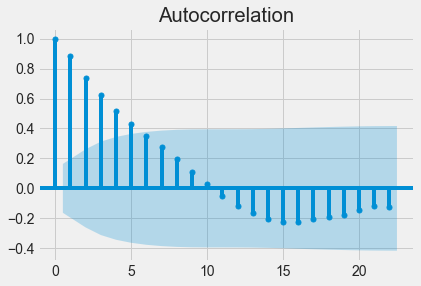

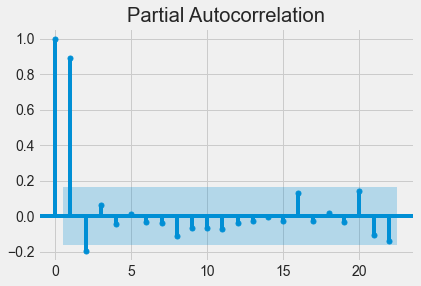

In [40]:
#find p,d,q
plot_acf(cycles_A)
plot_pacf(cycles_A)
plt.show()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  144
Model:                     ARMA(2, 0)   Log Likelihood                 158.767
Method:                       css-mle   S.D. of innovations              0.080
Date:                Wed, 01 Dec 2021   AIC                           -309.533
Time:                        16:22:58   BIC                           -297.654
Sample:                    01-01-2006   HQIC                          -304.706
                         - 12-01-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0561      0.079     13.410      0.000       0.902       1.210
ar.L1.y        1.2894      0.079     16.309      0.000       1.134       1.444
ar.L2.y       -0.3723      0.081     -4.606      0.0

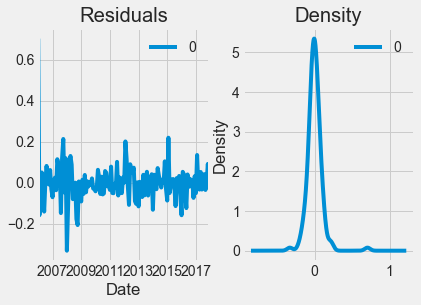

                0
count  144.000000
mean    -0.001473
std      0.097548
min     -0.332530
25%     -0.049332
50%     -0.003066
75%      0.038463
max      0.702489


In [42]:
# Fit and ARMA(p,q) model to the cycles
from statsmodels.tsa.arima_model import ARIMA

# fit model
model_A = ARIMA(cycles_A,order=(2,0,0))
model_fit_A = model_A.fit(disp=0)
print(model_fit_A.summary())

# plot residual erros
residuals_A = pd.DataFrame(model_fit_A.resid)
#residuals.plot()
#residuals.plot(kind='kde')
fig, ax = plt.subplots(1,2)
residuals_A.plot(title="Residuals", ax=ax[0])
residuals_A.plot(kind='kde', title='Density', ax=ax[1])
plt.show()
print(residuals_A.describe())

For the Apple stock price model, all independent variables are statistically significant, and the residual plot for the Apple model appears to be a straight line close to zero, implying that the Apple model is consistent with the assumption that the residuals are independent. As well as the Google stock price model below, all the independent variables are statistically significant except for the constant. In addition, although the residual plot of the Google model looks a bit noisy, the overall trend of the residual plot of the Google model looks like a straight line close to zero, which also implies that the Google model is consistent with the assumption that the residuals are independent.

For each combination of parameters, we fit a new seasonal ARIMA model using the SARIMAX() function of the statsmodels module (also known as ARIMA_ here) and evaluate its overall quality. We will use the AIC values to measure how the model fits the data, taking into account the overall complexity of the model. In the case of using a large number of features, models that fit the data will be assigned a larger AIC score than models that use fewer features to obtain the same fit. Therefore, we are interested in finding models that produce the lowest AIC values. After several experiments it was demonstrated that ARIMA_(2,0,0)*(0, 0, 1, 12) produced the lowest AIC value of 834.995. Therefore, we believe that this is the best choice among all the models we have considered.

We have identified the set of parameters to generate the best-fit model for our time series data. We can analyze this particular model in more depth.

We start by inserting the best parameter values into the new ARIMAX_ model.

In [43]:
from statsmodels.tsa.arima.model import ARIMA as ARIMA_
model_A_final= ARIMA_(data_A, order=(2,0,0),trend=[0,0,1],seasonal_order=(0,0,1,12))   
fitted_A = model_A_final.fit()  
print(fitted_A.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             A_High   No. Observations:                  144
Model:             ARIMA(2, 0, 0)x(0, 0, [1], 12)   Log Likelihood                -412.497
Date:                            Wed, 01 Dec 2021   AIC                            834.995
Time:                                    16:22:59   BIC                            849.844
Sample:                                01-01-2006   HQIC                           841.028
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0081      0.000     17.463      0.000       0.007       0.009
ar.L1          1.1893      0.080   

The ARIMAX_ generated from the output of ARIMAX_ returns a large amount of information, but we focus our attention on the coefficient table. The coef column shows the importance of each feature and how each feature affects the time series. The p-value column informs us of the significance of each feature weight. Here, each weight has a p-value below 0.05 or even 0 , so it is reasonable to retain all weights in our model. These observations lead us to conclude that the new model we fit is optimal.

The same fitting procedure is applied to fit the new model for Google stock price.

#### Google

In [45]:
decomposeG = sm.tsa.seasonal_decompose(data_G["G_High"],model='multiplicative', extrapolate_trend='freq')
G_reconstructed = pd.concat([decomposeG.seasonal, decomposeG.trend, decomposeG.resid, decomposeG.observed], axis=1)
G_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
G_reconstructed.head()

,seas,trend,resid,actual_values
Date,,,,
2006-01-01,1.043159,174.609172,1.245688,226.896000
2006-02-01,1.001327,179.703117,1.049060,188.769474
2006-03-01,0.980855,184.797061,1.007208,182.565652
2006-04-01,0.986821,189.891006,1.119981,209.871579
2006-05-01,0.982352,194.984950,1.020491,195.468636


In [46]:
# Seasonally adjust the series
google_seasAdj = data_G.G_High / decomposeG.seasonal

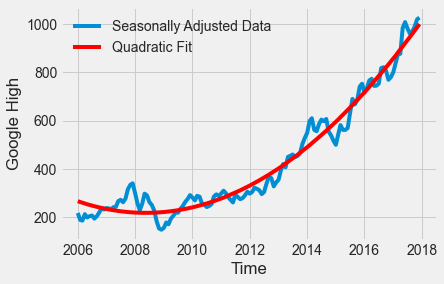

In [47]:
# Fit a quadratic trend
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

x_ts = data_G.index
y_ts = google_seasAdj
n = np.shape(y_ts)[0]

# Quadratic Fit
t = range(n)
p = np.polyfit(t,y_ts,2)
y = np.polyval(p,t)
plt.plot(x_ts,y_ts,label='Seasonally Adjusted Data')
plt.plot(x_ts,y,color='r',label ='Quadratic Fit')
plt.xlabel('Time')
plt.ylabel('Google High')
plt.legend()


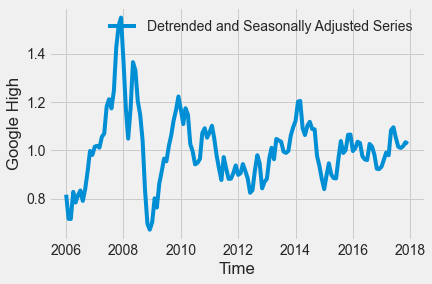

In [48]:
# Detrend Series and obtain the residuals (cycles)
cycles_G = y_ts/y
plt.plot(x_ts,cycles_G,label='Detrended and Seasonally Adjusted Series')
plt.xlabel('Time')
plt.ylabel('Google High')
plt.legend()


In [49]:
#cycles stationary

adf_cycles_G = adfuller(cycles_G)[1]
print(f"p value:{adf_cycles_G}", ", Series is Stationary" if adf_cycles_G < 0.05 else ", Series is Non-Stationary")


p value:0.0067499427262975335 , Series is Stationary


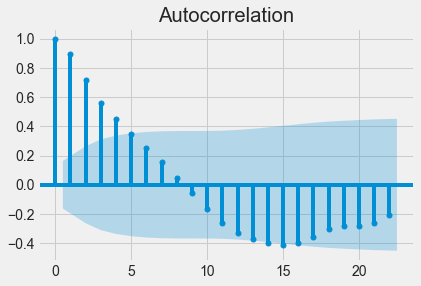

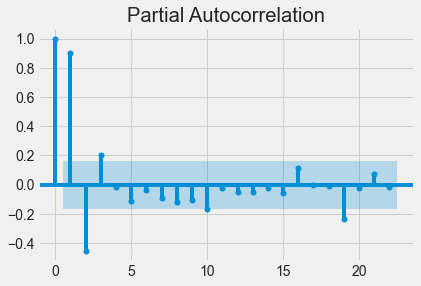

In [50]:
#find p,d,q
plot_acf(cycles_G)
plot_pacf(cycles_G)
plt.show()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  144
Model:                     ARMA(3, 0)   Log Likelihood                 206.634
Method:                       css-mle   S.D. of innovations              0.057
Date:                Wed, 01 Dec 2021   AIC                           -403.269
Time:                        16:23:04   BIC                           -388.420
Sample:                    01-01-2006   HQIC                          -397.235
                         - 12-01-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0001      0.038     26.133      0.000       0.925       1.075
ar.L1.y        1.3404      0.082     16.352      0.000       1.180       1.501
ar.L2.y       -0.6321      0.129     -4.906      0.0

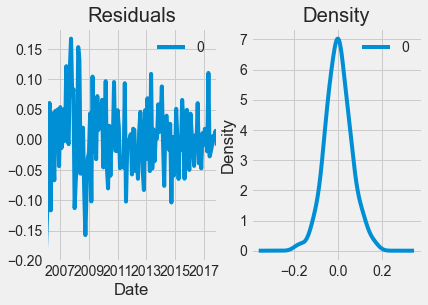

                0
count  144.000000
mean     0.000121
std      0.059265
min     -0.183358
25%     -0.039021
50%     -0.000081
75%      0.038636
max      0.167313


In [51]:
# Fit and ARMA(p,q) model to the cycles
from statsmodels.tsa.arima_model import ARIMA

# fit model
model_G = ARIMA(cycles_G,order=(3,0,0))
model_fit_G = model_G.fit(disp=0)
print(model_fit_G.summary())

# plot residual erros
residuals_G = pd.DataFrame(model_fit_G.resid)
#residuals.plot()
#residuals.plot(kind='kde')
fig, ax = plt.subplots(1,2)
residuals_G.plot(title="Residuals", ax=ax[0])
residuals_G.plot(kind='kde', title='Density', ax=ax[1])
plt.show()
print(residuals_G.describe())

In [91]:
model_G_final= ARIMA_(data_G, order=(3,0,0),trend=[0,0,1],seasonal_order=(0,0,0,12))   
fitted_G = model_G_final.fit()  
print(fitted_G.summary())

                               SARIMAX Results                                
Dep. Variable:                 G_High   No. Observations:                  144
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -643.324
Date:                Thu, 02 Dec 2021   AIC                           1300.647
Time:                        00:21:38   BIC                           1321.436
Sample:                    01-01-2006   HQIC                          1309.094
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        270.3136     33.900      7.974      0.000     203.871     336.756
x1            -3.5822      1.071     -3.344      0.001      -5.682      -1.482
x2             0.0605      0.007      8.672      0.0

The fitting process as well as the results are similar to Apple stock price. Both represent the best model.

## 5. Respective Residuals vs. Fitted Values

#### Apple

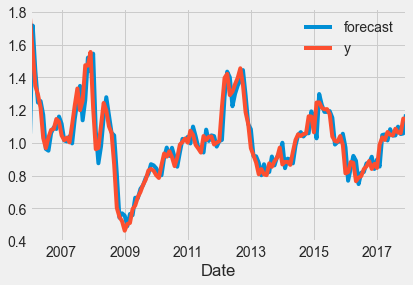

In [53]:
model_fit_A.plot_predict(dynamic=False)
plt.show()

#### Google

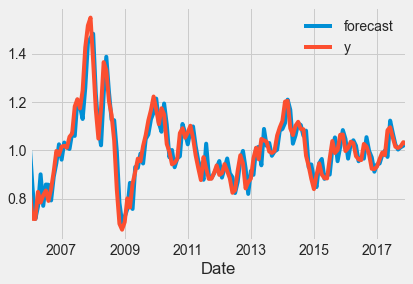

In [54]:
model_fit_G.plot_predict(dynamic=False)
plt.show()

According to the plots including both residual plots for Apple model and Google model, we discovered that the residual plots for both models are meet the assumption that the residuals are independent. In addition, as for looking into the forecast value and the actual value plot, we discovered that both two models are pretty accurate because the forecasting values are almost identical to the actual values according to the plots.

## 6.ACF & PACF of respective residuals

### Apple

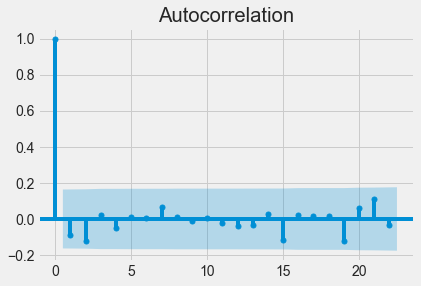

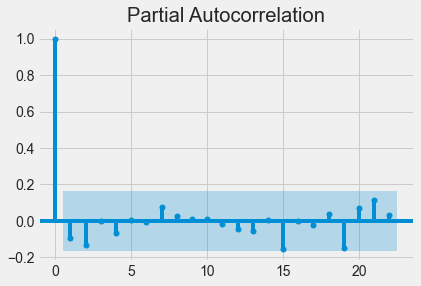

In [55]:
#  Verify that all the dynamics have been accounted for
# We should now get white noise for the ACF and PACF
plot_acf(residuals_A);
plot_pacf(residuals_A);

### Google

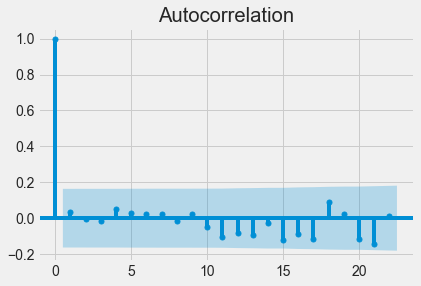

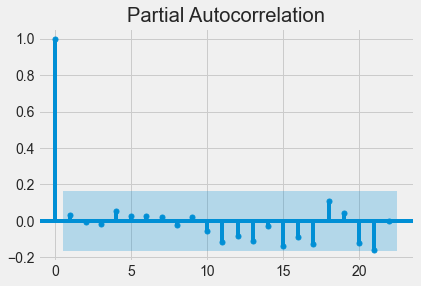

In [56]:
#  Verify that all the dynamics have been accounted for
# We should now get white noise for the ACF and PACF
plot_acf(residuals_G);
plot_pacf(residuals_G);

According to both ACF and PACF plots for both models, we discovered that the autocorrelations are small, therefore, there is little dependence between the dependent variables and the independent variables.

## 7&8. Plot the respective CUSUM & Recursive Residuals

### Apple

In [ ]:
import rpy2

import warnings
warnings.filterwarnings('ignore')

from rpy2.robjects import pandas2ri
import rpy2.rinterface as rinterface
pandas2ri.activate()

%load_ext rpy2.ipython

In [ ]:
%%R 
# Look  at the data
install.packages("tis")
library(tis)
require("datasets")
require(graphics)
library("forecast")
install.packages("tseries")
library(tseries)
install.packages("zoo")
library(zoo)
library(stats)
install.packages("fpp")
library(fpp)
install.packages("strucchange")
require("sandwich")
library(strucchange)

In [ ]:
data = read.csv("E:/FINA363/aaple.csv")
m1=Arima(data$A_High,order=c(2,1,0),include.drift=TRUE,seasonal=list(order=c(1,0,1)))
fit1=auto.arima(data$A_High)
library(strucchange)
y1=recresid(m1$res~1)
plot(y1, pch=16,ylab="Apple Recursive Residuals")

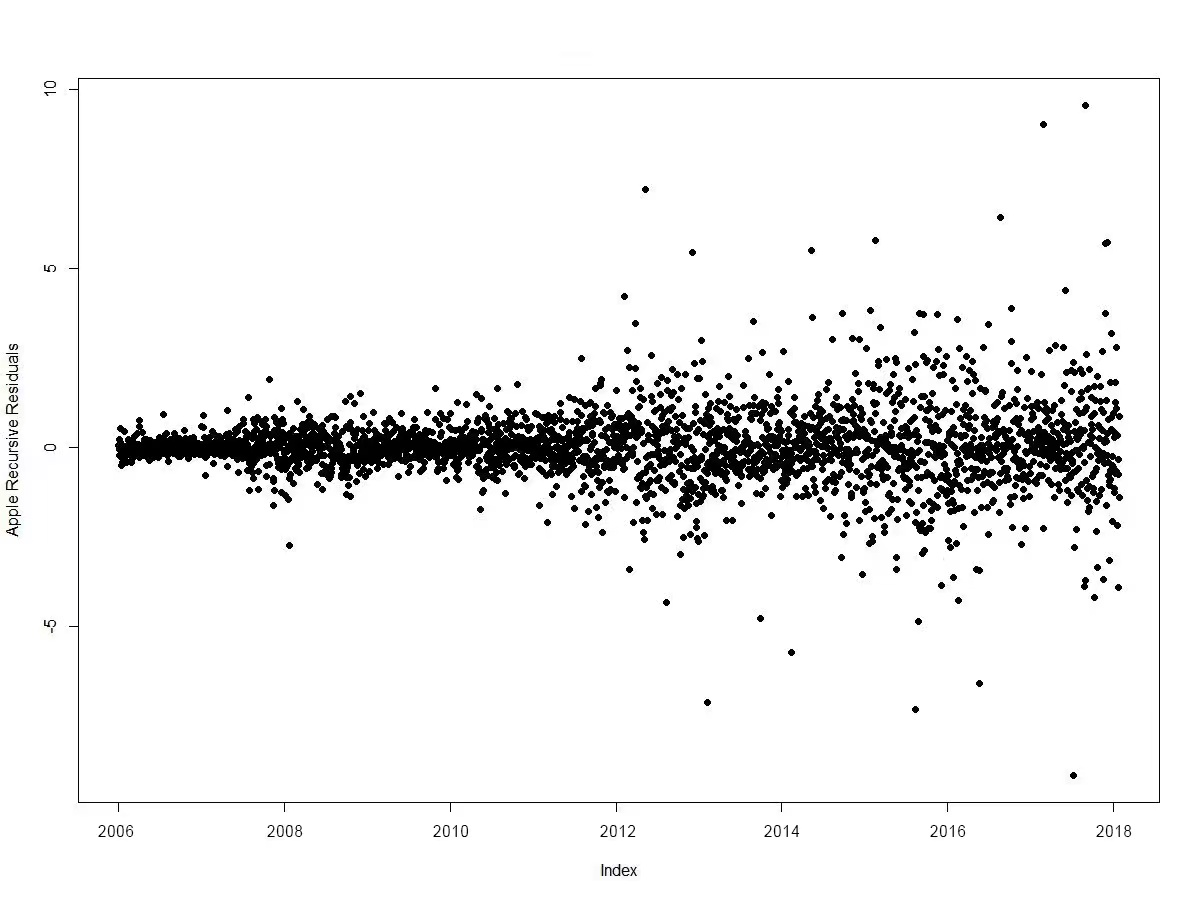

First observe that our recursive residuals are found to be within a range of fitted values and centered at zero. It meets the assumptions of the model and has some properties of the error. So the residuals of our model are uncorrelated and have a mean distribution of zero. This is a very good model.

In [ ]:
plot(efp(m1$res~1, type = "Rec-CUSUM"))

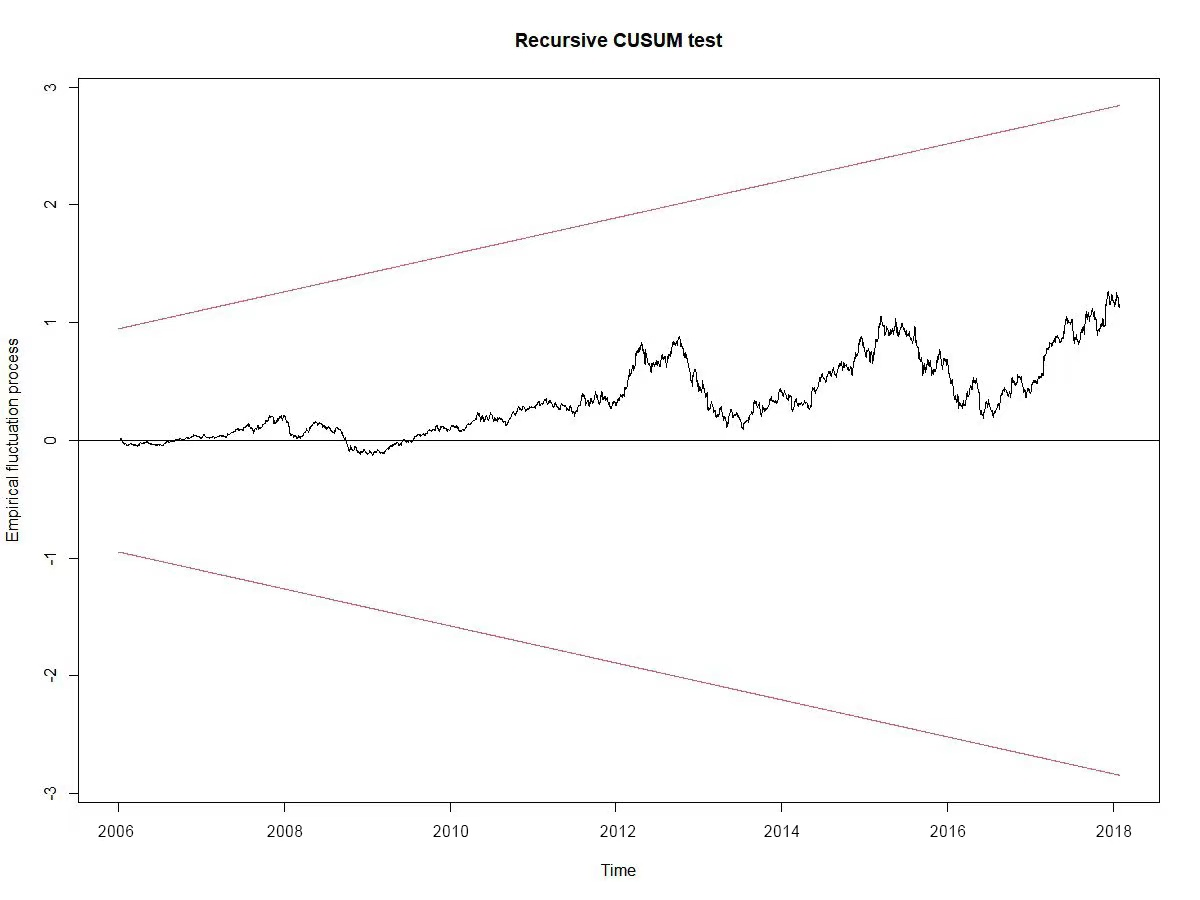

The CUSUM statistic is available in the cusum attribute, but usually it is more convenient to visually check for parameter stability using the plot_cusum method. In the plot below, the CUSUM statistic does not move outside of the 5% significance bands, so we fail to reject the null hypothesis of stable parameters at the 5% level.The predicted data are in good agreement with the observed values.

### google

In [ ]:
data_G = read.csv("E:/FINA363/google.csv")
install.packages("astrochron")
library(astrochron)
m2=Arima(data_G$G_High,order=c(3,1,0),include.drift=TRUE,seasonal=list(order=c(1,0,1)))
fit2=auto.arima(data_G$G_High)
library(strucchange)
y2=recresid(m2$res~1)
plot(y2, pch=16,ylab="Google Recursive Residuals")

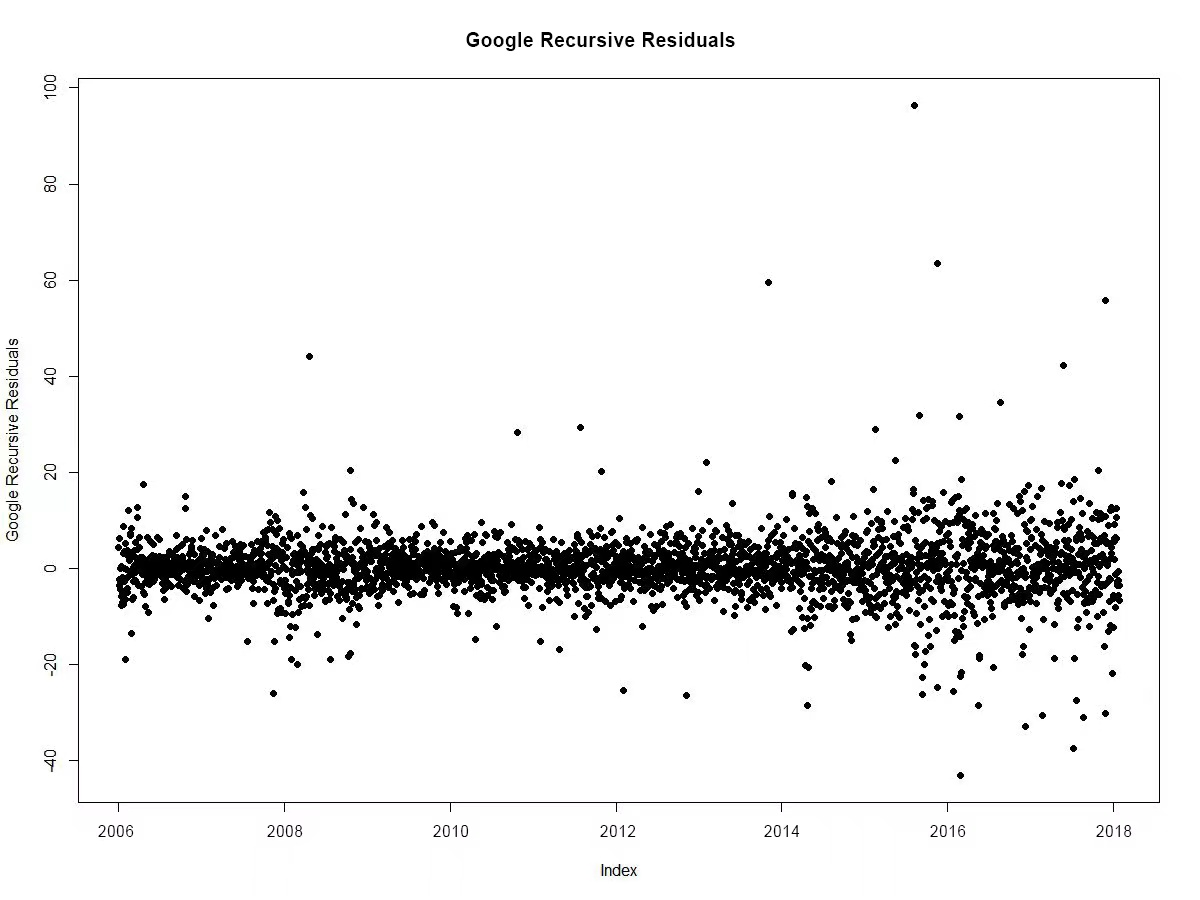

First observe that our recursive residuals are found to be within a range of fitted values and centered at zero. It meets the assumptions of the model and has some properties of the error. So the residuals of our model are uncorrelated and have a mean distribution of zero. This is a very good model.

In [ ]:
plot(efp(m2$res~1, type = "Rec-CUSUM"))

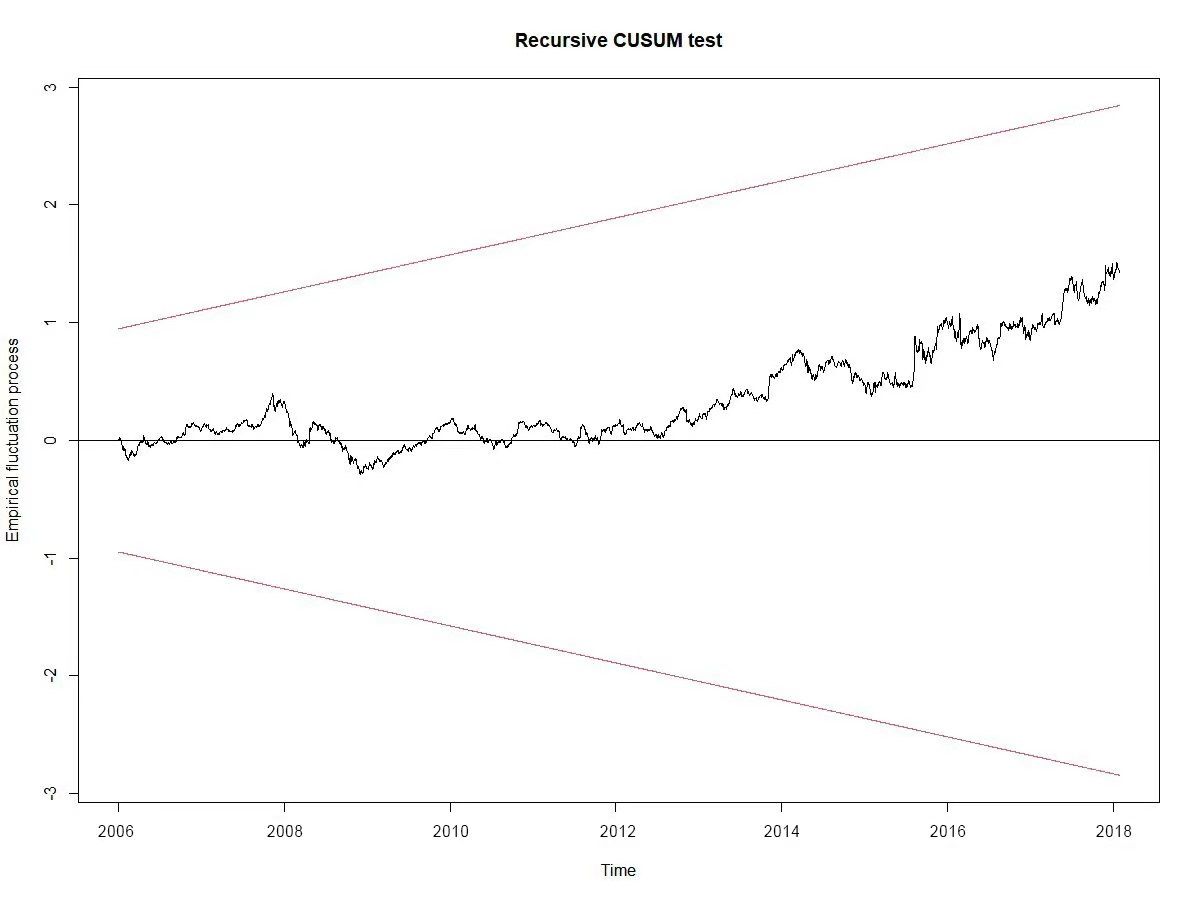

The CUSUM statistic is available in the cusum attribute, but usually it is more convenient to visually check for parameter stability using the plot_cusum method. In the plot above, the CUSUM statistic does not move outside of the 5% significance bands, so we fail to reject the null hypothesis of stable parameters at the 5% level. The predicted data are in good agreement with the observed values.

## 9. Diagnostic statistics.

#### Apple

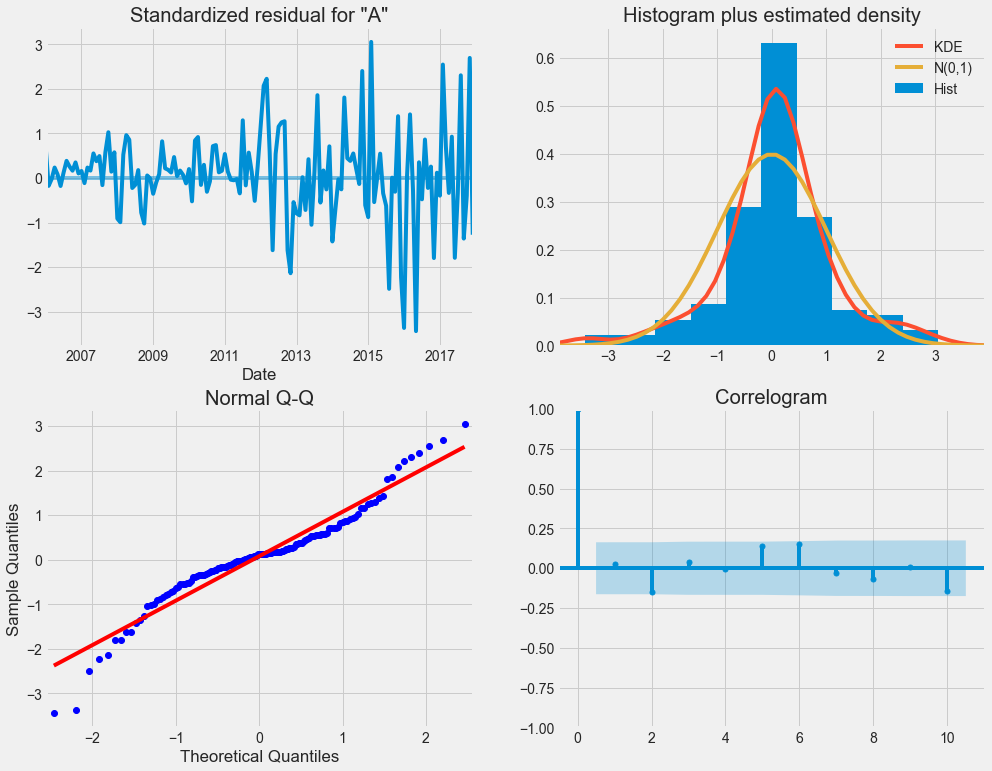

In [57]:
fitted_A.plot_diagnostics(figsize=(15,12))
plt.show()

Standardized Residual plots can be used to estimate whether the observed or predicted error is consistent with the random error when performing statistical diagnostics on the average monthly maximum price of Apple shares. First, our residual plots are not piecewise very high or very low, but are within a range of fitted values and are centered on zero. In other words, the fit to our model of the average monthly maximum Apple stock price is scattered evenly around the fitted value points and has a constant uniform spread across the fitted range, so our residual plots reflect not only the randomness but also the unpredictability of the stock price. In the upper right panel, we see that the red KDE line does not coincide with the N(0,1) row (where N(0,1) ) . This seems to imply that the residuals do not follow the normal distribution. The qq-plot in the lower left shows that the residuals are not distributed in an ordered manner. The residuals over time (top left panel) do not show any significant seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e., correlation plot) in the lower right corner, which indicates that the time series residuals have a low correlation with their own lagged values. These observations lead us to conclude that our model is not a very good model relative to Google, although it does not violate the model assumptions and has less anomalous behavior. Next, a model diagnosis is performed for Google.

#### Google

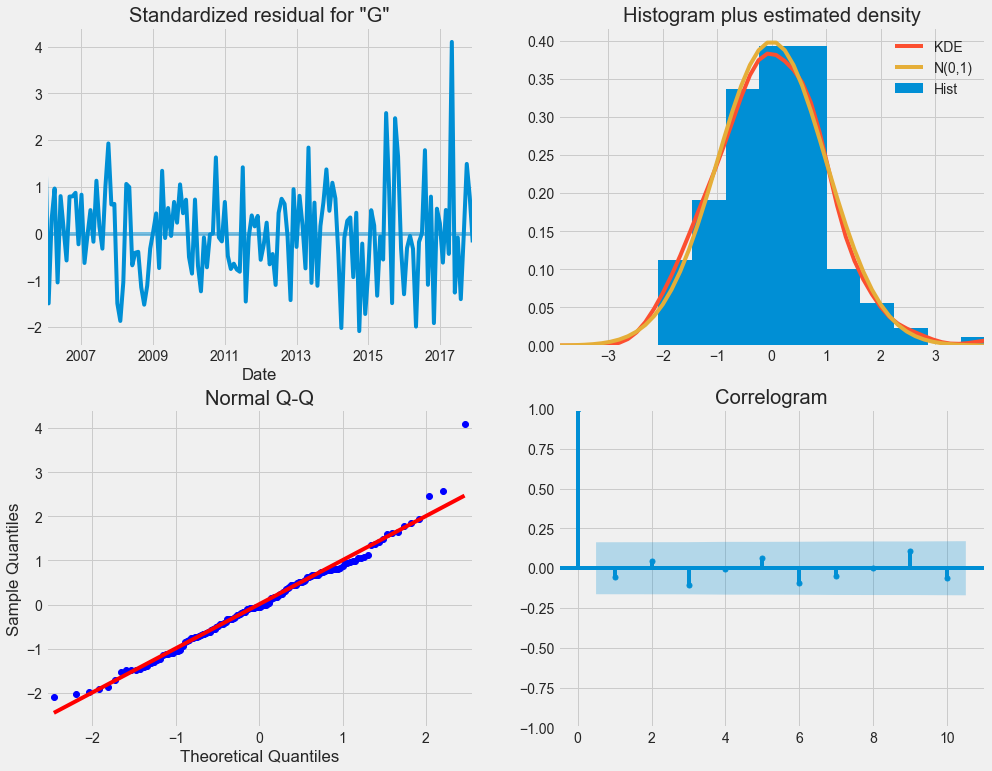

In [58]:
fitted_G.plot_diagnostics(figsize=(15,12))
plt.show()

Based on the above description, we can first ensure that the residuals of our Google stock model are uncorrelated and have a zero mean distribution. This is a very good sign. In this case, our model diagnosis shows that the normal distribution of model residuals is as follows.
In the upper right panel, we see the red KDE line with the N(0,1) row (where N(0,1) ) is the standard sign of the normal distribution with mean 0 , and standard deviation of 1 ) . This is a good indication of the normal distribution of the residues.
The qq plot in the lower left corner shows that the ordered distribution of residuals follows a linear trend using a standard normal distribution sampled by N(0, 1). Again, this is a strong indication of the normal distribution of the residuals. The residuals over time (top left panel) do not show any significant seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e., correlation plot) in the lower right corner, which indicates that the time series residuals have a low correlation with their own lagged values.
These observations lead us to conclude that our Google Stock model is satisfactorily chosen to help us understand our time series data and predict future values.


## 10. 12 steps ahead

#### Apple

In [ ]:
# our model forcast

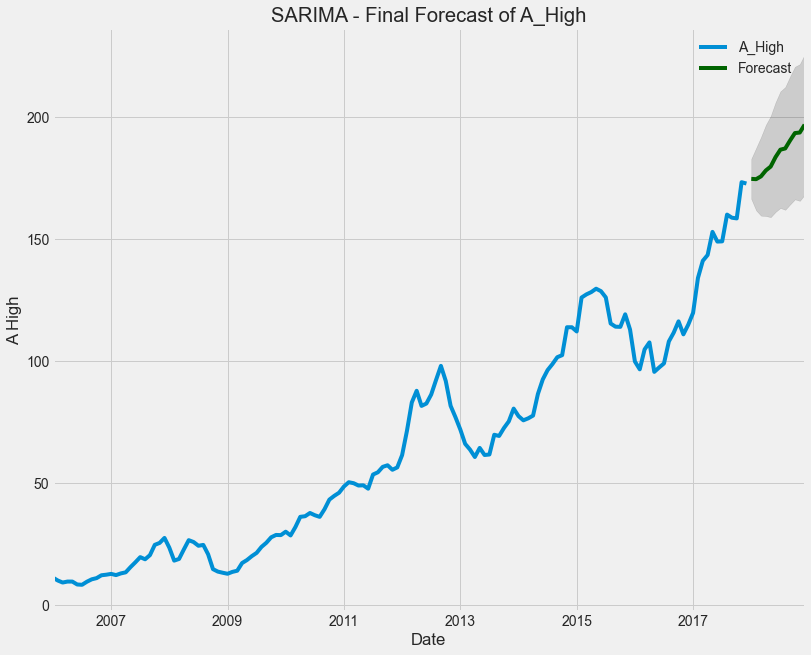

In [59]:
pred_uc = fitted_A.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = data_A.plot(label='observed', figsize=(12,10))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast',color='darkgreen')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.15)
plt.title("SARIMA - Final Forecast of A_High")
ax.set_xlabel('Date')
ax.set_ylabel('A High')
plt.legend()
plt.show()

In [ ]:
#baseline model forcast

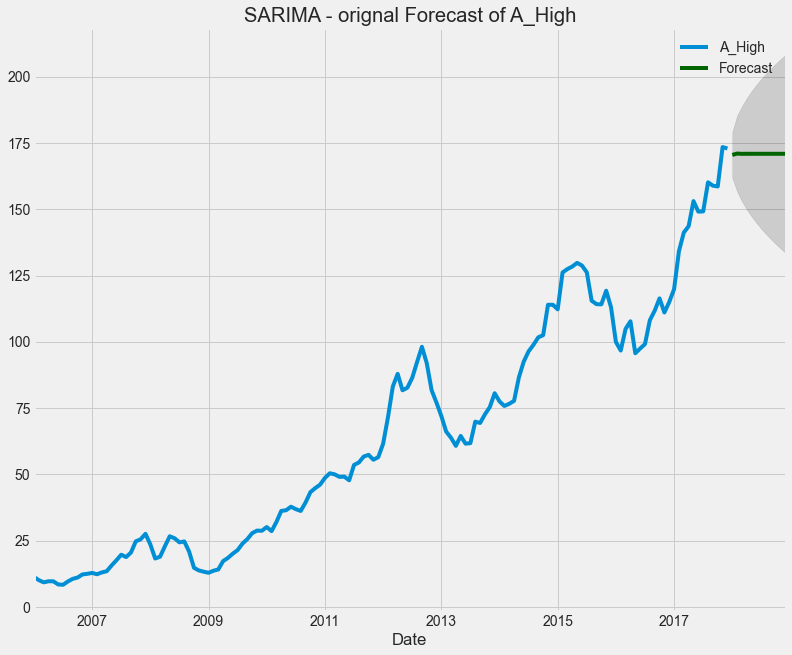

In [60]:
pred_u3 = model_1.get_forecast(steps=12)
pred_c3 = pred_u3.conf_int()
ax3 = data_A.plot(label='observed', figsize=(12,10))
pred_u3.predicted_mean.plot(ax=ax3, label='Forecast',color='darkgreen')
ax3.fill_between(pred_c3.index,
                pred_c3.iloc[:, 0],
                pred_c3.iloc[:, 1], color='k', alpha=.15)
plt.title("SARIMA - orignal Forecast of A_High")
ax.set_xlabel('Date')
ax.set_ylabel('A High')
plt.legend()
plt.show()

#### Google

In [ ]:
#our model forcast

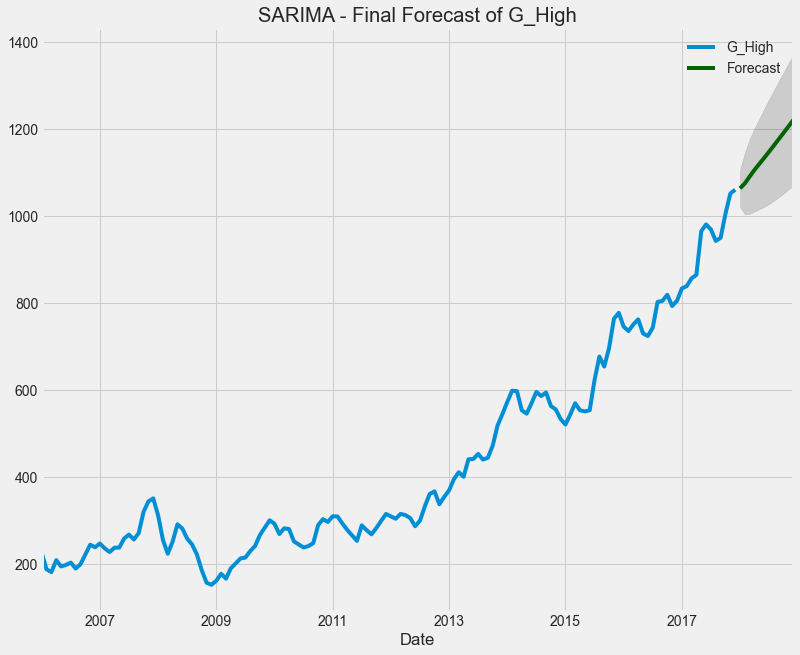

In [61]:
pred_ug = fitted_G.get_forecast(steps=12)
pred_cg = pred_ug.conf_int()
ax1 = data_G.plot(label='observed', figsize=(12,10))
pred_ug.predicted_mean.plot(ax=ax1, label='Forecast',color='darkgreen')
ax1.fill_between(pred_cg.index,
                pred_cg.iloc[:, 0],
                pred_cg.iloc[:, 1], color='k', alpha=.15)
plt.title("SARIMA - Final Forecast of G_High")
ax.set_xlabel('Date')
ax.set_ylabel('G High')
plt.legend()
plt.show()

In [ ]:
#baseline model forcast

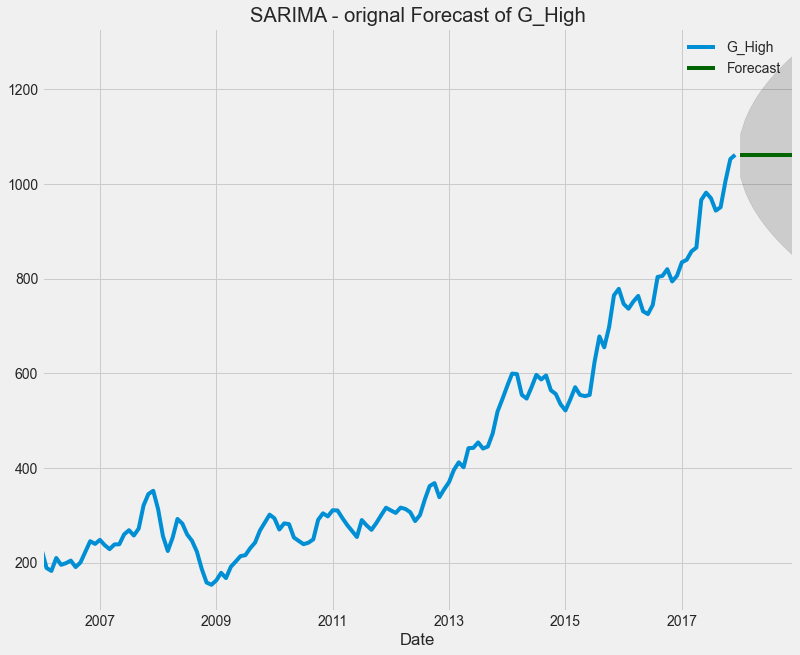

In [62]:
pred_u4 = model_2.get_forecast(steps=12)
pred_c4 = pred_u4.conf_int()
ax4 = data_G.plot(label='observed', figsize=(12,10))
pred_u4.predicted_mean.plot(ax=ax4, label='Forecast',color='darkgreen')
ax4.fill_between(pred_c4.index,
                pred_c4.iloc[:, 0],
                pred_c4.iloc[:, 1], color='k', alpha=.15)
plt.title("SARIMA - orignal Forecast of G_High")
ax.set_xlabel('Date')
ax.set_ylabel('G High')
plt.legend()
plt.show()

Use our generated forecasts and associated confidence intervals to further understand the time series and anticipate expectations by analyzing the 12-step forecasts of the new model with the benchmark model for Google and Apple stock prices. We can see that the predicted trend of the model in question 4 is indeed volatile and our forecasts show that the time series is expected to continue to grow steadily. This is in line with the historical theoretical trend. However, the predicted trend of the baseline 12-step model appears to be flat. Therefore, we can conclude that we are more and more naturally more confident in our new model as we make further predictions about the future. This is reflected in the confidence interval generated by our model, which gets larger and larger as we move further into the future. So the new model is the best model than the baseline model for that matter.

## 11. Backtesting scheme & MAPE

### part (a) Recursive scheme 12-step ahead

#### Apple

In [75]:
from statsmodels.tsa.arima.model import ARIMA as ARIMA_
error_12_r = np.array([])
MAPE_12_r = np.array([])
for i in range(120,132):
    train, test = data_A['A_High'][0:i], data_A['A_High'][i+11:i+12]
    model_recursive = ARIMA_(train, order=(2,0,0), trend=[0,0,1], seasonal_order=(0,0,1,12)).fit()
    forecast_recursive = model_recursive.forecast(12)[11]
    errortmp = test - forecast_recursive
    error_12_r = np.append(error_12_r,errortmp)
    mapetmp = np.abs(errortmp)/np.abs(test)
    MAPE_12_r = np.append(MAPE_12_r,mapetmp)
    
    print(MAPE_12_r)


[0.2516565]
[0.2516565  0.03038092]
[0.2516565  0.03038092 0.05752002]
[0.2516565  0.03038092 0.05752002 0.0293415 ]
[0.2516565  0.03038092 0.05752002 0.0293415  0.00554826]
[0.2516565  0.03038092 0.05752002 0.0293415  0.00554826 0.21753615]
[0.2516565  0.03038092 0.05752002 0.0293415  0.00554826 0.21753615
 0.12921798]
[0.2516565  0.03038092 0.05752002 0.0293415  0.00554826 0.21753615
 0.12921798 0.12528286]
[0.2516565  0.03038092 0.05752002 0.0293415  0.00554826 0.21753615
 0.12921798 0.12528286 0.08125047]
[0.2516565  0.03038092 0.05752002 0.0293415  0.00554826 0.21753615
 0.12921798 0.12528286 0.08125047 0.07286567]
[0.2516565  0.03038092 0.05752002 0.0293415  0.00554826 0.21753615
 0.12921798 0.12528286 0.08125047 0.07286567 0.04093838]
[0.2516565  0.03038092 0.05752002 0.0293415  0.00554826 0.21753615
 0.12921798 0.12528286 0.08125047 0.07286567 0.04093838 0.17027765]


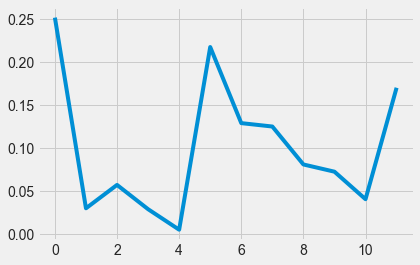

In [76]:
plt.plot(MAPE_12_r)
plt.show()

#### google

In [78]:
error_12_G = np.array([])
MAPE_12_G = np.array([])
for i in range(120,132):
    train, test = data_G['G_High'][0:i], data_G['G_High'][i+11:i+12]
    model_recursive_G = ARIMA_(train, order=(3,0,0), trend=[0,0,1], seasonal_order=(0,0,0,12)).fit()
    forecast_recursive_G = model_recursive_G.forecast(12)[11]
    errortmp_G = test - forecast_recursive_G
    error_12_G = np.append(error_12_G,errortmp_G)
    mapetmp_G = np.abs(errortmp_G)/np.abs(test)
    MAPE_12_G = np.append(MAPE_12_G,mapetmp_G)
    
    print(MAPE_12_G)

[0.12167692]
[0.12167692 0.04766254]
[0.12167692 0.04766254 0.04935096]
[0.12167692 0.04766254 0.04935096 0.04243258]
[0.12167692 0.04766254 0.04935096 0.04243258 0.03609888]
[0.12167692 0.04766254 0.04935096 0.04243258 0.03609888 0.12107073]
[0.12167692 0.04766254 0.04935096 0.04243258 0.03609888 0.12107073
 0.12222575]
[0.12167692 0.04766254 0.04935096 0.04243258 0.03609888 0.12107073
 0.12222575 0.09537666]
[0.12167692 0.04766254 0.04935096 0.04243258 0.03609888 0.12107073
 0.12222575 0.09537666 0.00283721]
[0.12167692 0.04766254 0.04935096 0.04243258 0.03609888 0.12107073
 0.12222575 0.09537666 0.00283721 0.02911662]
[0.12167692 0.04766254 0.04935096 0.04243258 0.03609888 0.12107073
 0.12222575 0.09537666 0.00283721 0.02911662 0.04210673]
[0.12167692 0.04766254 0.04935096 0.04243258 0.03609888 0.12107073
 0.12222575 0.09537666 0.00283721 0.02911662 0.04210673 0.12519595]


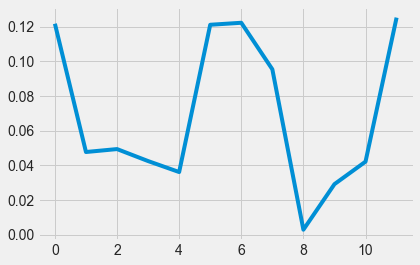

In [79]:
plt.plot(MAPE_12_G)
plt.show()

### part (b)recursive scheme 1-step ahead

In [80]:
error_1_r = np.array([])
MAPE_1_r = np.array([])
for i in range(120,144):
    train, test = data_A['A_High'][0:i], data_A['A_High'][i:i+1]
    model_recursive = ARIMA_(train, order=(2,0,0), trend=[0,0,1], seasonal_order=(0,0,1,12)).fit()
    forecast_recursive = model_recursive.forecast()[0]
    errortmp = test - forecast_recursive
    error_1_r = np.append(error_1_r,errortmp)
    mapetmp = np.abs(errortmp)/np.abs(test)
    MAPE_1_r = np.append(MAPE_1_r,mapetmp)

    print(MAPE_1_r)


[0.12830277]
[0.12830277 0.00284455]
[0.12830277 0.00284455 0.07491524]
[0.12830277 0.00284455 0.07491524 0.02609946]
[0.12830277 0.00284455 0.07491524 0.02609946 0.15921291]
[0.12830277 0.00284455 0.07491524 0.02609946 0.15921291 0.04486068]
[0.12830277 0.00284455 0.07491524 0.02609946 0.15921291 0.04486068
 0.00805327]
[0.12830277 0.00284455 0.07491524 0.02609946 0.15921291 0.04486068
 0.00805327 0.05840992]
[0.12830277 0.00284455 0.07491524 0.02609946 0.15921291 0.04486068
 0.00805327 0.05840992 0.01133224]
[0.12830277 0.00284455 0.07491524 0.02609946 0.15921291 0.04486068
 0.00805327 0.05840992 0.01133224 0.0125629 ]
[0.12830277 0.00284455 0.07491524 0.02609946 0.15921291 0.04486068
 0.00805327 0.05840992 0.01133224 0.0125629  0.0744021 ]
[0.12830277 0.00284455 0.07491524 0.02609946 0.15921291 0.04486068
 0.00805327 0.05840992 0.01133224 0.0125629  0.0744021  0.0181291 ]
[0.12830277 0.00284455 0.07491524 0.02609946 0.15921291 0.04486068
 0.00805327 0.05840992 0.01133224 0.0125629  

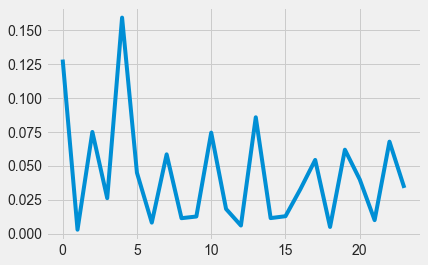

In [81]:
plt.plot(MAPE_1_r)
plt.show()

#### Google

In [82]:
error_1_G = np.array([])
MAPE_1_G = np.array([])
for i in range(120,144):
    train, test = data_G['G_High'][0:i], data_G['G_High'][i:i+1]
    model_recursive_G = ARIMA_(train, order=(3,0,0), trend=[0,0,1], seasonal_order=(0,0,0,12)).fit()
    forecast_recursive_G = model_recursive_G.forecast()[0]
    errortmp_G = test - forecast_recursive_G
    error_1_G = np.append(error_1_G,errortmp)
    mapetmp_G = np.abs(errortmp_G)/np.abs(test)
    MAPE_1_G = np.append(MAPE_1_G,mapetmp_G)

    print(MAPE_1_G)

[0.04029799]
[0.04029799 0.00474175]
[0.04029799 0.00474175 0.00109382]
[0.04029799 0.00474175 0.00109382 0.00853005]
[0.04029799 0.00474175 0.00109382 0.00853005 0.05783599]
[0.04029799 0.00474175 0.00109382 0.00853005 0.05783599 0.00167111]
[0.04029799 0.00474175 0.00109382 0.00853005 0.05783599 0.00167111
 0.0046656 ]
[0.04029799 0.00474175 0.00109382 0.00853005 0.05783599 0.00167111
 0.0046656  0.05113057]
[0.04029799 0.00474175 0.00109382 0.00853005 0.05783599 0.00167111
 0.0046656  0.05113057 0.03184638]
[0.04029799 0.00474175 0.00109382 0.00853005 0.05783599 0.00167111
 0.0046656  0.05113057 0.03184638 0.02562567]
[0.04029799 0.00474175 0.00109382 0.00853005 0.05783599 0.00167111
 0.0046656  0.05113057 0.03184638 0.02562567 0.05104788]
[0.04029799 0.00474175 0.00109382 0.00853005 0.05783599 0.00167111
 0.0046656  0.05113057 0.03184638 0.02562567 0.05104788 0.01952858]
[0.04029799 0.00474175 0.00109382 0.00853005 0.05783599 0.00167111
 0.0046656  0.05113057 0.03184638 0.02562567 

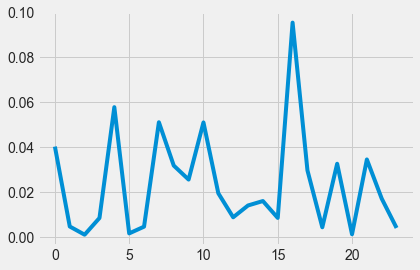

In [83]:
plt.plot(MAPE_1_G)
plt.show()

### part(c) Model perform

After observing that in the 12-step prediction, the horizon prediction range value of Apple stock price is at (0, 0.25) and Google's range value is at (0, 0.12). However, in the one-step prediction, the horizon prediction range for Apple stock price is at (0, 0.15) and Google's range is at (0, 0.10). Both for Apple and Google, my model performs better in the shorter horizon forecasts.

### part(d) Moving window backtesting scheme.

#### d.1 Moving window scheme 12-step ahead about APPLE

[-28.94684859]
[-28.94684859  -6.53458276]
[-28.94684859  -6.53458276   8.90477387]
[-28.94684859  -6.53458276   8.90477387  -4.69885385]
[-28.94684859  -6.53458276   8.90477387  -4.69885385   0.47691532]
[-28.94684859  -6.53458276   8.90477387  -4.69885385   0.47691532
  35.26385383]
[-28.94684859  -6.53458276   8.90477387  -4.69885385   0.47691532
  35.26385383  22.14159241]
[-28.94684859  -6.53458276   8.90477387  -4.69885385   0.47691532
  35.26385383  22.14159241  19.75162473]
[-28.94684859  -6.53458276   8.90477387  -4.69885385   0.47691532
  35.26385383  22.14159241  19.75162473  14.22477879]
[-28.94684859  -6.53458276   8.90477387  -4.69885385   0.47691532
  35.26385383  22.14159241  19.75162473  14.22477879  13.05162159]
[-28.94684859  -6.53458276   8.90477387  -4.69885385   0.47691532
  35.26385383  22.14159241  19.75162473  14.22477879  13.05162159
   8.52669428]
[-28.94684859  -6.53458276   8.90477387  -4.69885385   0.47691532
  35.26385383  22.14159241  19.75162473  14.224

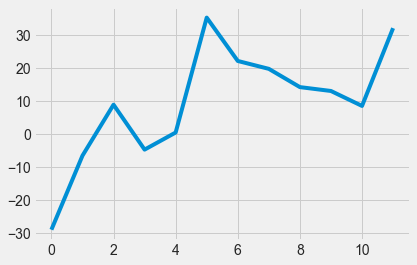

In [65]:
#window=120
w = 120
error_12_w = np.array([])
MAPE_12_w = np.array([])
for i in range(0,12):
    train, test = data_A['A_High'][0+i:w+i], data_A['A_High'][w+i+11:w+i+12]
    model_window  = ARIMA_(train, order=(2,0,0), trend=[0,0,1], seasonal_order=(0,0,1,12)).fit()
    forecast_window  = model_window.forecast(12)[11]
    errortmp = test - forecast_window
    error_12_w = np.append(error_12_w,errortmp)
    mapetmp = np.abs(errortmp)/np.abs(test)
    MAPE_12_w = np.append(MAPE_12_w,mapetmp)

    print(error_12_w)

plt.plot(error_12_w)
plt.show()


#### d.2 Moving window scheme 1-step ahead about APPLE

[-12.82379419]
[-12.82379419  -0.42111189]
[-12.82379419  -0.42111189   7.93767394]
[-12.82379419  -0.42111189   7.93767394  -2.54838124]
[-12.82379419  -0.42111189   7.93767394  -2.54838124 -15.089776  ]
[-12.82379419  -0.42111189   7.93767394  -2.54838124 -15.089776
   4.48322921]
[-12.82379419  -0.42111189   7.93767394  -2.54838124 -15.089776
   4.48322921  -0.57411244]
[-12.82379419  -0.42111189   7.93767394  -2.54838124 -15.089776
   4.48322921  -0.57411244   6.47736441]
[-12.82379419  -0.42111189   7.93767394  -2.54838124 -15.089776
   4.48322921  -0.57411244   6.47736441  -1.09214951]
[-12.82379419  -0.42111189   7.93767394  -2.54838124 -15.089776
   4.48322921  -0.57411244   6.47736441  -1.09214951   1.62803605]
[-12.82379419  -0.42111189   7.93767394  -2.54838124 -15.089776
   4.48322921  -0.57411244   6.47736441  -1.09214951   1.62803605
  -7.99836685]
[-12.82379419  -0.42111189   7.93767394  -2.54838124 -15.089776
   4.48322921  -0.57411244   6.47736441  -1.09214951   1.6280

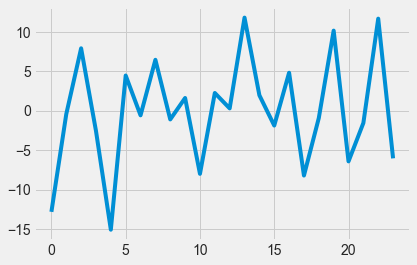

In [84]:
#(window=120)
w = 120
error_1_w = np.array([])
MAPE_1_w = np.array([])
for i in range(0,24):
    train, test = data_A['A_High'][0+i:w+i], data_A['A_High'][w+i:w+i+1]
    model_window  = ARIMA_(train, order=(2,0,0), trend=[0,0,1], seasonal_order=(0,0,1,12)).fit()
    forecast_window  = model_window.forecast()[0]
    errortmp = test - forecast_window
    error_1_w = np.append(error_1_w,errortmp)
    mapetmp = np.abs(errortmp)/np.abs(test)
    MAPE_1_w = np.append(MAPE_1_w,mapetmp)
    print(error_1_w)
    
plt.plot(error_1_w)
plt.show()

                                                             

#### d.3 Moving window scheme 12-step ahead about GOOGLE

[-98.07316012]
[-98.07316012 -41.92078629]
[-98.07316012 -41.92078629 -45.72967172]
[-98.07316012 -41.92078629 -45.72967172 -40.10845489]
[-98.07316012 -41.92078629 -45.72967172 -40.10845489 -36.64038532]
[-98.07316012 -41.92078629 -45.72967172 -40.10845489 -36.64038532
 112.32421992]
[-98.07316012 -41.92078629 -45.72967172 -40.10845489 -36.64038532
 112.32421992 114.62601838]
[-98.07316012 -41.92078629 -45.72967172 -40.10845489 -36.64038532
 112.32421992 114.62601838  84.65874746]
[-98.07316012 -41.92078629 -45.72967172 -40.10845489 -36.64038532
 112.32421992 114.62601838  84.65874746 -12.87732581]
[-98.07316012 -41.92078629 -45.72967172 -40.10845489 -36.64038532
 112.32421992 114.62601838  84.65874746 -12.87732581  20.67564676]
[-98.07316012 -41.92078629 -45.72967172 -40.10845489 -36.64038532
 112.32421992 114.62601838  84.65874746 -12.87732581  20.67564676
  35.38845617]
[-98.07316012 -41.92078629 -45.72967172 -40.10845489 -36.64038532
 112.32421992 114.62601838  84.65874746 -12.877

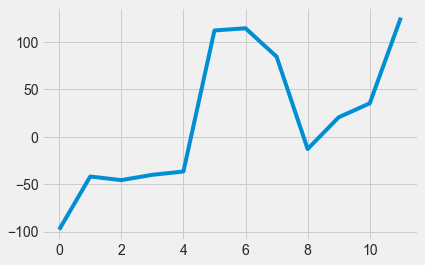

In [88]:
#window=120
wd = 120
error_12_wg = np.array([])
MAPE_12_wg = np.array([])
for i in range(0,12):
    train, test = data_G['G_High'][0+i:wd+i], data_G['G_High'][wd+i+11:wd+i+12]
    model_window_G  = ARIMA_(train, order=(3,0,0), trend=[0,0,1], seasonal_order=(0,0,0,12)).fit()
    forecast_window_G  = model_window_G.forecast(12)[11]
    errortmp_G = test - forecast_window_G
    error_12_wg = np.append(error_12_wg,errortmp_G)
    mapetmp_g = np.abs(errortmp_G)/np.abs(test)
    MAPE_12_wg = np.append(MAPE_12_wg,mapetmp_g)

    print(error_12_wg)

plt.plot(error_12_wg)
plt.show()

#### d.4 Moving window scheme 1-step ahead about GOOGLE

[-30.08696454]
[-30.08696454  -4.03769509]
[-30.08696454  -4.03769509   1.02358692]
[-30.08696454  -4.03769509   1.02358692  -6.76999436]
[-30.08696454  -4.03769509   1.02358692  -6.76999436 -42.66260644]
[-30.08696454  -4.03769509   1.02358692  -6.76999436 -42.66260644
   1.55791613]
[-30.08696454  -4.03769509   1.02358692  -6.76999436 -42.66260644
   1.55791613   3.3952318 ]
[-30.08696454  -4.03769509   1.02358692  -6.76999436 -42.66260644
   1.55791613   3.3952318   40.4789384 ]
[-30.08696454  -4.03769509   1.02358692  -6.76999436 -42.66260644
   1.55791613   3.3952318   40.4789384  -27.19537155]
[-30.08696454  -4.03769509   1.02358692  -6.76999436 -42.66260644
   1.55791613   3.3952318   40.4789384  -27.19537155  20.4419328 ]
[-30.08696454  -4.03769509   1.02358692  -6.76999436 -42.66260644
   1.55791613   3.3952318   40.4789384  -27.19537155  20.4419328
 -41.03190388]
[-30.08696454  -4.03769509   1.02358692  -6.76999436 -42.66260644
   1.55791613   3.3952318   40.4789384  -27.1953

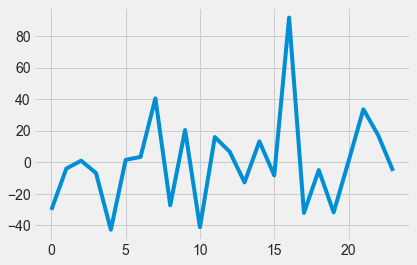

In [89]:
#(window=120)
wg = 120
error_1_wg = np.array([])
MAPE_1_wg = np.array([])
for i in range(0,24):
    train, test = data_G['G_High'][0+i:wg+i], data_G['G_High'][wg+i:wg+i+1]
    model_window_g  = ARIMA_(train, order=(3,0,0), trend=[0,0,1], seasonal_order=(0,0,0,12)).fit()
    forecast_window_g  = model_window_g.forecast()[0]
    errortmp_g = test - forecast_window_g
    error_1_wg = np.append(error_1_wg,errortmp_g)
    mapetmp_g = np.abs(errortmp_g)/np.abs(test)
    MAPE_1_wg = np.append(MAPE_1_wg,mapetmp_g)
    print(error_1_wg)
    
plt.plot(error_1_wg)
plt.show()

   

### part (e) RBS vs. MABS

#### e.1 Apple

In [68]:
errorw = np.mean(np.square(error_1_w))
errorr = np.mean(np.square(error_1_r))
print('error of recursive scheme:'+str(errorr),'error of moving window scheme:'+str(errorw),sep='\n')


error of recursive scheme:47.700088763345434
error of moving window scheme:48.19926306312639


#### e.2 Google

In [90]:
errorwg = np.mean(np.square(error_1_wg))
errorrg = np.mean(np.square(error_1_G))
print('error of recursive scheme:'+str(errorrg),'error of moving window scheme:'+str(errorwg),sep='\n')


error of recursive scheme:33.86231341770469
error of moving window scheme:828.3125117738127


Since one-step forecasting observes better results in the short run, we use one-step forecasting data for our calculations here. By looking at the recursive backtesting scheme error as well as the moving average backtesting scheme error for Apple and Google stock prices. We find that both companies' stock prices in general exhibit a moving average backtesting scheme showing higher errors. This also suggests that the recursive backtesting process provides more reliable estimates for the model implementation in practice.

### part(f) which model is better?

In conclusion, our ARIMA model is better because by looking at our 12-step forecasts versus 1-step forecasts, the average absolute error percentage for each step is calculated as well as a comparison chart. Testing with a moving window backtesting scheme as well as recursive backtesting scheme for forecasting, we found that the model is not very volatile. We found that the overall quality of the new model is better than the original model and is more suitable for predicting future stock price highs.

## III. Conclusions and Future Work

In this project, we analyzed the average monthly high stock prices of both companies for trend, cyclicality, and seasonality, and the time series had a clear seasonal pattern with an overall upward trend. We first performed a baseline model to fit the arima but in this case we did not add trend and seasonality to the model so we could not fit the variation of the data well. 

Then we built a new ARIMA model that includes all the components in this model. by looking at the results of the new ARIMA model, the coef column shows the weight (i.e. importance) of each feature and how each feature affects the time series. The p-value column informs us of the significance of each feature's weight. Here, the p-value for each weight is below or close to 0.05 , so it is reasonable to retain all weights in our model. 

In the case of fit seasonal ARIMA models (and any other models), it is very important to run model diagnostics to ensure that the assumptions of the model are not violated. So looking at the model diagnostics reveals that the new model residuals are fluctuating around 0 and the probability density plot is consistent with a normal distribution. acf and pacf plots show no correlation link to the previous. From these observations it can be concluded that our new model is more satisfactory and can help us to understand our time series data and predict future values. To be more confident of this result, we performed a backtest. Overall, our new model predictions are consistent with the true values, showing an overall increasing trend.

Accompanying the better results of the new model is the fact that the model for Google's stock price fits relatively better than the model for Apple's stock price, as can be seen in our model diagnostics. This is because Google's stock price residuals are normally distributed and the ordered distribution of residuals follows the linear trend of the standard normal distribution sampling. Again, this is a strong indication of a normal distribution of residuals.

In future work we will fit an appropriate VAR model using two time series variables and perform Granger causality tests on the variables. Granger causality is determined directly using whether adding the historical value of one series improves the prediction of the other series. Determine whether they are synchronously correlated, with instantaneous causality if the null hypothesis is rejected, and no instantaneous causality otherwise. Calculate, plot and interpret the respective impulse response functions.

## IV. References

A. C. Harvey (1985) Trends and Cycles in Macroeconomic Time Series, Journal of Business & Economic Statistics, 3:3, 216-227, DOI: 10.1080/07350015.1985.10509453

DJIA 30 Stock Time Series:Historical stock data for DIJA 30 companies (2006-01-01 to 2018-01-01, "https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231"

Jayesh Salvi(2019)Significance of ACF and PACF Plots In Time Series Analysis,"https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8"
